Import Library

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import random

from numpy import expand_dims
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Input
from datetime import datetime
from sklearn.utils import shuffle
from tensorflow import keras
from keras.models import load_model

Define Load Data

In [ ]:
def LoadCitraTraining(sDir,LabelKelas):  
  JumlahKelas=len(LabelKelas)
  TargetKelas = np.eye(JumlahKelas)
  X=[]
  T=[]
  for i in range(len(LabelKelas)):    
    DirKelas = os.path.join(sDir, LabelKelas[i])
    files = os.listdir(DirKelas)
    for f in files:
      ff=f.lower()  
      print(f)
      if (ff.endswith('.jpg')|ff.endswith('.jpeg')|ff.endswith('.png')):
         NmFile = os.path.join(DirKelas,f) 
         img= np.double(cv2.imread(NmFile,1))
         img=cv2.resize(img,(128,128));
         img= np.asarray(img)/255;
         img=img.astype('float32')
         X.append(img)
         T.append(TargetKelas[i])
  X=np.array(X)
  T=np.array(T)
  X=X.astype('float32')
  T=T.astype('float32')
  return X,T

Define Model CNN

In [ ]:
def ModelDeepLearningCNN(JumlahKelas):
    input_img = Input(shape=(128, 128, 3)) 
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)  
    x = MaxPooling2D((2, 2), padding='same')(x)   
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)   
    x = MaxPooling2D((2, 2), padding='same')(x)   
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(100,activation='relu')(x)
    x=Dense(JumlahKelas,activation='softmax')(x)
    ModelCNN = Model(input_img, x)  
    ModelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ModelCNN

Define Training

In [ ]:
def TrainingCNN(JumlahEpoh,DirektoriDataSet,LabelKelas,NamaFileBobot):
    X,D=LoadCitraTraining(DirektoriDataSet,LabelKelas)
    JumlahKelas = len(LabelKelas)
    ModelCNN =ModelDeepLearningCNN(JumlahKelas)
    history=ModelCNN.fit(X, D,epochs=JumlahEpoh,shuffle=True)
    ModelCNN.save(NamaFileBobot)
    return ModelCNN,history

Define LoadModel

In [2]:
def LoadModel(sf):
  ModelCNN=load_model(sf)   
  return ModelCNN 

Define Augment Image

In [ ]:
def ImageAugmentation(SPath,Kelas):
  parent_dir = SPath 
  directory = Kelas
  directoryExt =directory +"_ext"
  sdirExt = os.path.join(parent_dir, directoryExt)
  if not os.path.exists(sdirExt):
    os.mkdir(sdirExt)
  directory_image =directory
  sDir = os.path.join(parent_dir, directory_image)
  files = os.listdir(sDir)
  ii=0
  for f in files:
    ff=f.lower()
    if (ff.endswith('.jpg')|ff.endswith('.jpeg')|ff.endswith('.png')):
      print(ff)
      sfs= os.path.join(sDir,ff)
      img = load_img(sfs)
      img2 = np.array(img)
      sfn= os.path.join(sdirExt, ff)
      cv2.imwrite(sfn,img2)
      data = img_to_array(img)
      samples = expand_dims(data, 0)
      datagen = ImageDataGenerator(rotation_range=90,brightness_range=[0.2,2.0],zoom_range=[0.5,2.0],width_shift_range=0.2,height_shift_range=0.2)
      it = datagen.flow(samples, batch_size=1)
      for i in range(9):
        batch = it.next()
        image = batch[0].astype('uint8')
        now = datetime.now() 
        ii=ii+1
        sf = now.strftime("%Y%m%d%H%M%S")+"_"+str(ii)+".jpg"
        sfn= os.path.join(sdirExt, sf)
        cv2.imwrite(sfn,image)

Show Dataset Example

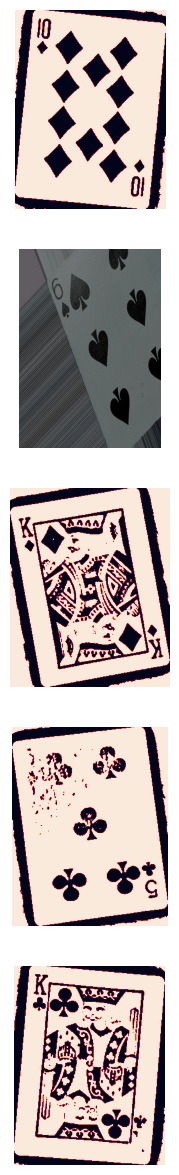

In [3]:
dataset_dir = "C:/Users/jerem/Downloads/TENSORFLOW/DatSetK"

num_classes_to_show = 5
num_images_per_class = 1
class_directories = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
selected_classes = random.sample(class_directories, min(num_classes_to_show, len(class_directories)))
fig, axes = plt.subplots(num_classes_to_show, num_images_per_class, figsize=(15, 3*num_classes_to_show))

for i, selected_class in enumerate(selected_classes):
    class_dir = os.path.join(dataset_dir, selected_class)
    image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith((".jpg", ".png"))]
    selected_image_files = random.sample(image_files, min(num_images_per_class, len(image_files)))

    for j, image_path in enumerate(selected_image_files):
        image = plt.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis("off")

plt.show()

Adjust Parameter

Lakukan Training

In [ ]:
DirSet = "C:/Users/jerem/Downloads/TENSORFLOW/DatSetK"
LabelKelas = (
    "2-Keriting", "3-Keriting", "4-Keriting", "5-Keriting", "6-Keriting", "7-Keriting", "8-Keriting", "9-Keriting", "10-Keriting", "Jack-Keriting", "Queen-Keriting", "King-Keriting", "Ace-Keriting",
    "2-Hati", "3-Hati", "4-Hati", "5-Hati", "6-Hati", "7-Hati", "8-Hati", "9-Hati", "10-Hati", "Jack-Hati", "Queen-Hati", "King-Hati", "Ace-Hati",
    "2-Berlian", "3-Berlian", "4-Berlian", "5-Berlian", "6-Berlian", "7-Berlian", "8-Berlian", "9-Berlian", "10-Berlian", "Jack-Berlian", "Queen-Berlian", "King-Berlian", "Ace-Berlian",
    "2-Sekop", "3-Sekop", "4-Sekop", "5-Sekop", "6-Sekop", "7-Sekop", "8-Sekop", "9-Sekop", "10-Sekop", "Jack-Sekop", "Queen-Sekop", "King-Sekop","Ace-Sekop")

TrainingCNN(3, DirSet, LabelKelas,"REMI_HASIL.h5")